In [60]:
  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
 
# Set a random seed for reproducibility
np.random.seed(0)
 
apple_data=pd.read_csv(r"C:\Users\agnes\Documents\apziva_ai_residency\project5\data\appl_data.csv")

apple_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.059425,135480400
1,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.349129,146322800
2,2020-01-06,73.447502,74.989998,73.187500,74.949997,72.925644,118387200
3,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.582664,108872000
4,2020-01-08,74.290001,76.110001,74.290001,75.797501,73.750252,132079200


In [61]:

# Make sure your "Date" column is in datetime format
apple_data['Date'] = pd.to_datetime(apple_data['Date'])
 
# Sorting the data by date (if not sorted)
apple_data = apple_data.sort_values(by='Date')
 
# Resetting the index
apple_data.set_index('Date', inplace=True)
 
apple_data.dropna(inplace=True)

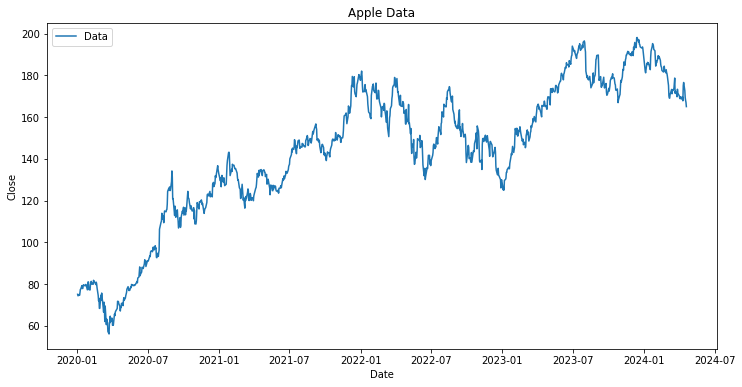

In [62]:
  
# Visualize the data
plt.figure(figsize=(12, 6))
plt.plot( apple_data['Close'], label='Data')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.title('Apple Data')
plt.show()

In [65]:

# Adding lag features to the DataFrame
for i in range(1, 6):  # Creating lag features up to 5 days
    apple_data[f'Lag_{i}'] = apple_data['Close'].shift(i)
 
# Drop rows with NaN values resulting from creating lag features
apple_data.dropna(inplace=True)
 
# Split the data into training and testing sets
train_size = int(0.8 * len(apple_data))
train_data = apple_data[:train_size]
test_data = apple_data[train_size:]
 
# Define the input features (lag features) and target variable
 
y_train = train_data['Close']
 
y_test = test_data['Close']


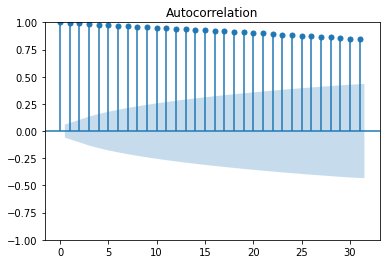

Date
2020-01-16    78.809998
2020-01-17    79.682503
2020-01-21    79.142502
2020-01-22    79.425003
2020-01-23    79.807503
Name: Close, dtype: float64

In [66]:
   
from statsmodels.graphics.tsaplots import plot_acf
series = apple_data['Close']
plot_acf(series)
plt.show()
series.head()

In [68]:
apple_data['Close'].corr(apple_data['Close'].shift(1))


0.9968258922581458

In [69]:
   
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.api import AutoReg
from sklearn.metrics import mean_absolute_error, mean_squared_error
 
# Create and train the autoregressive model
lag_order = 1 # Adjust this based on the ACF plot
ar_model = AutoReg(y_train, lags=lag_order)
ar_results = ar_model.fit()

In [70]:
  
# Make predictions on the test set
y_pred = ar_results.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)
#print(y_pred)
 
# Calculate MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

Mean Absolute Error: 8.53
Root Mean Squared Error: 10.97


Date
2023-06-13    183.309998
2023-06-14    183.949997
2023-06-15    186.009995
2023-06-16    184.919998
2023-06-20    185.009995
                 ...    
2024-04-15    172.690002
2024-04-16    169.380005
2024-04-17    168.000000
2024-04-18    167.039993
2024-04-19    165.000000
Name: Close, Length: 215, dtype: float64


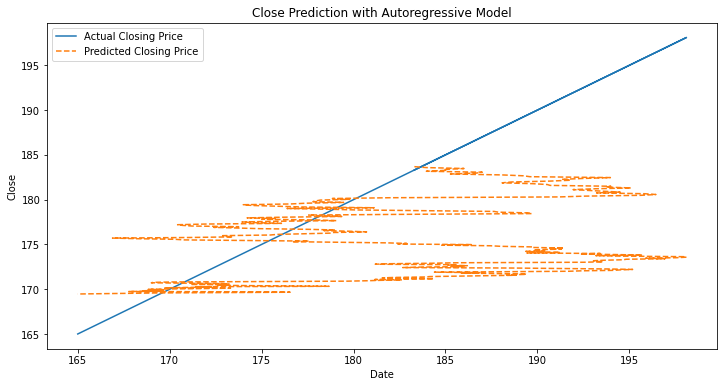

In [76]:
print(test_data['Close'])
# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(test_data['Close'] ,y_test, label='Actual Closing Price')
plt.plot( test_data['Close'],y_pred, label='Predicted Closing Price', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.title('Close Prediction with Autoregressive Model')
plt.show()

In [54]:
test_data

,Open,High,Low,Close,Adj Close,Volume,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5
Date,,,,,,,,,,,
2023-06-14,183.369995,184.389999,182.020004,183.949997,183.226425,57462900,183.309998,183.789993,180.960007,180.570007,177.820007
2023-06-15,183.960007,186.520004,183.779999,186.009995,185.278336,65433200,183.949997,183.309998,183.789993,180.960007,180.570007
2023-06-16,186.729996,186.990005,184.270004,184.919998,184.192627,101235600,186.009995,183.949997,183.309998,183.789993,180.960007
2023-06-20,184.410004,186.100006,184.410004,185.009995,184.282257,49799100,184.919998,186.009995,183.949997,183.309998,183.789993
2023-06-21,184.899994,185.410004,182.589996,183.960007,183.236404,49515700,185.009995,184.919998,186.009995,183.949997,183.309998
...,...,...,...,...,...,...,...,...,...,...,...
2024-04-15,175.360001,176.630005,172.500000,172.690002,172.690002,73531800,176.550003,175.039993,167.779999,169.669998,168.449997
2024-04-16,171.750000,173.759995,168.270004,169.380005,169.380005,73711200,172.690002,176.550003,175.039993,167.779999,169.669998
2024-04-17,169.610001,170.649994,168.000000,168.000000,168.000000,50901200,169.380005,172.690002,176.550003,175.039993,167.779999


In [96]:
# create and evaluate an updated autoregressive model
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series = read_csv(r"C:\Users\agnes\Documents\apziva_ai_residency\project5\data\appl_data.csv", header=0, index_col=0, parse_dates=True)
# split dataset
df_close = series['Close']
print(df_close)
df_log = np.log(df_close)
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
print(train_data.head())
# train autoregression
window = 29
model = AutoReg(train_data, lags=29)
model_fit = model.fit()
coef = model_fit.params
# walk forward over time steps in test
history = train_data[len(train_data)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()


Date
2020-01-02     75.087502
2020-01-03     74.357498
2020-01-06     74.949997
2020-01-07     74.597504
2020-01-08     75.797501
                 ...    
2024-04-15    172.690002
2024-04-16    169.380005
2024-04-17    168.000000
2024-04-18    167.039993
2024-04-19    165.000000
Name: Close, Length: 1082, dtype: float64
Date
2020-01-07    4.312107
2020-01-08    4.328065
2020-01-09    4.349084
2020-01-10    4.351342
2020-01-13    4.372481
Name: Close, dtype: float64


In [95]:
for t in range(len(test_data)):
    print(t)
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
        obs = test[t]
        predictions.append(yhat)
        history.append(obs)
        print(history)
        print('predicted=%f, expected=%f' % (yhat, obs))
        rmse = sqrt(mean_squared_error(test_data, predictions))
        print('Test RMSE: %.3f' % rmse)
# plot
pyplot.plot(test_data)
pyplot.plot(predictions, color='red')
pyplot.show()

0
[5.149817322826369, 5.1570993857203105, 5.164271576856079, 5.178914300249401, 5.18732996904819, 5.183972161341731, 5.191845139010589, 5.196893573562788, 5.186547499831477, 5.185820342151145, 5.17699679685754, 5.169574469828938, 5.1674111349646115, 5.152597740442571, 5.153291594497779, 5.155831732327655, 5.14224821657036, 5.117334909098103, 5.125272653790878, 5.137502826612432, 5.14031764691795, 5.158882877573204, 5.17936493861768, 5.174170339253692, 5.1886698734056385, 5.203017226976511, 5.208884875879224, 5.206256920775076, 5.227894869507308, array([1.68339996e+02, 1.75460007e+02, 1.68160004e+02, 1.75039993e+02,
       1.75039993e+02, 9.10703000e+07]), array([1.68339996e+02, 1.75460007e+02, 1.68160004e+02, 1.75039993e+02,
       1.75039993e+02, 9.10703000e+07]), array([1.68339996e+02, 1.75460007e+02, 1.68160004e+02, 1.75039993e+02,
       1.75039993e+02, 9.10703000e+07]), array([1.68339996e+02, 1.75460007e+02, 1.68160004e+02, 1.75039993e+02,
       1.75039993e+02, 9.10703000e+07])]


TypeError: only size-1 arrays can be converted to Python scalars